# MaestroSDK

## In this notebook you will:

- Connect with Maestro SDK
- Create and Finish a Task
- Create a new Log and Log Entries
- Fetch entries from a Log
- Delete a Log
- Emit Alerts
- Send Messages
- Download and Upload Artifacts / Result Files

## Prerequisites:

- **Python 3.7+**


- **BotCity Maestro SDK Python Package - botcity-maestro-sdk**

  If you don't have the package installed yet, follow the instructions on the [project documentation website](https://botcity-dev.github.io/botcity-maestro-sdk-python/index.html).


- **Bot Maestro Account**
  
  In order to follow this tutorial you must have a BotCity account.
  If you don't have one yet, sign up now for a FREE Community Edition account by [clicking here](https://developers.botcity.dev/app/signup).


In [ ]:
# For simplicity let's import everything from the Maestro SDK
from botcity.maestro import *

## BotMaestroSDK
The `BotMaestroSDK` is the main class to be used when interacting with BotMaestro.

In [ ]:
maestro = BotMaestroSDK()

## Login

The login information is available when you access BotMaestro and click on the `Dev. Environment` menu.
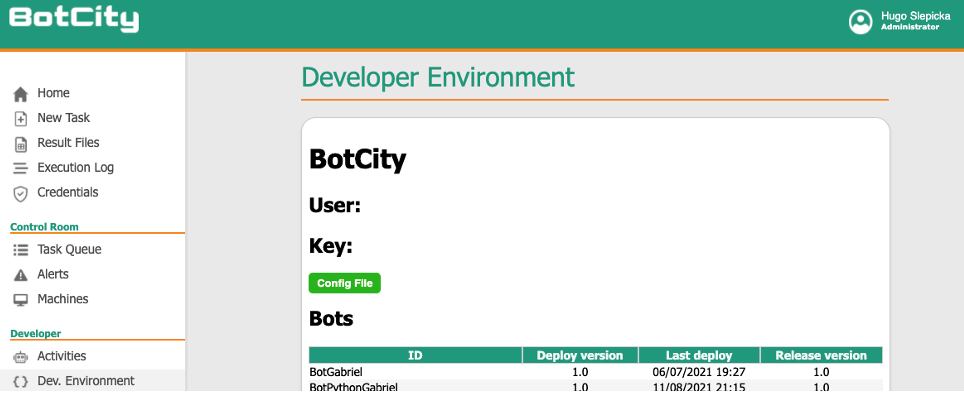

In [ ]:
maestro.login("YOUR_SERVER_HERE", "YOUR_USER_HERE", "YOUR_KEY_HERE")

If everything went well with the login, your maestro object now should have an `access_token`. Check it out by printing the current token assigned to your connection:

In [ ]:
print(maestro.access_token)

## Activity

For the subsequent parts of this tutorial I will use an existing Activity available on my BotMaestro instance.

Looking at the image below you can notice the **Label** column. This is the value which we will refer to during the next steps as `activity label`. So in my case it will be `DemoActivity`. Make sure to adjust as needed for your case.

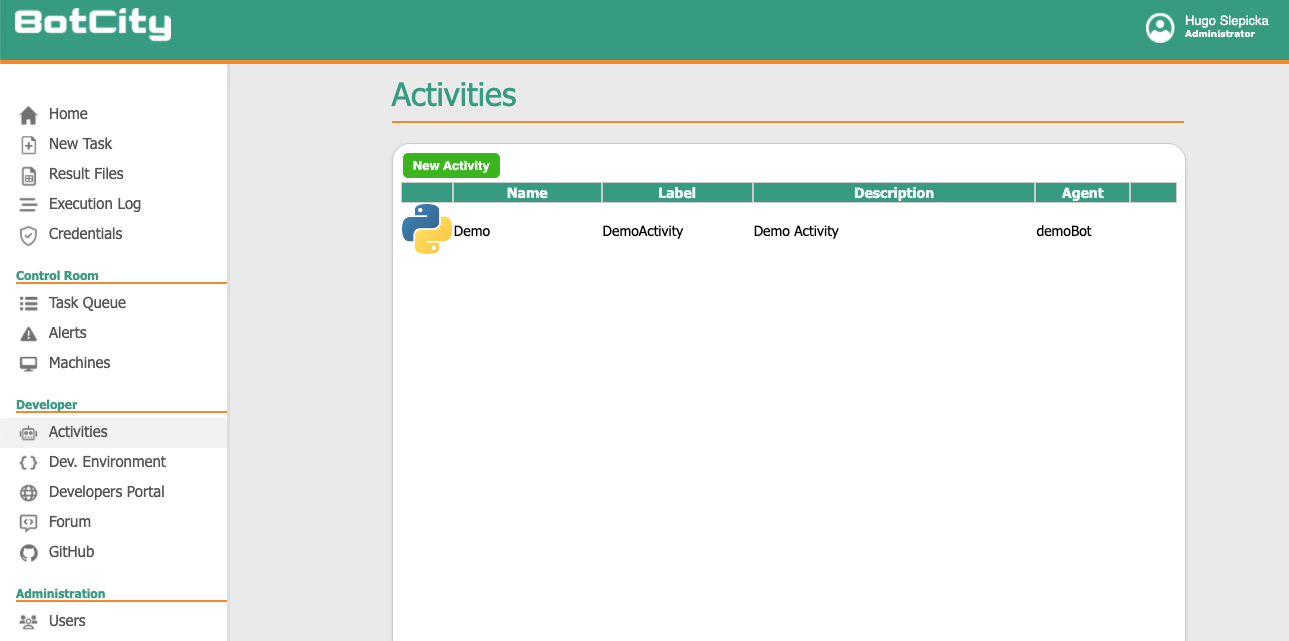

If you need help creating an Activity please refer to the BotMaestro documentation available [here](https://botcity.atlassian.net/wiki/spaces/CBG/overview).

## Tasks

Tasks are instances of an Activity.


### Creating a Task
We can create a new task via the BotMaestro SDK using the following code:

(More information and details on the parameters used can be found [here](https://botcity-dev.github.io/botcity-maestro-sdk-python/api/sdk.html#botcity.maestro.sdk.BotMaestroSDK.create_task).)

In [ ]:
task = maestro.create_task(activity_label="DemoActivity", parameters={}, test=False)

Inspecting the returned object we can find interesting information that will be used on the following steps when we interact with the task.

In [ ]:
print(task)

### Finishing a Task
Once tasks are created, they are queued on the BotMaestro and collected for execution by the **BotRunner**.

The tasks that are collected for execution move forward to the `Running` state.

It is the bot developer responsibility to inform the BotMaestro via the SDK of the proper final status of a task.

This allow for better control and also to add details about the task completion that can later be inspected by users via the BotMaestro portal.

A task can be finished with one of the following Status:

- `SUCCESS`: The task finished successfully.
- `FAILED`: The task failed to finish.
- `PARTIALLY_COMPLETED`: The task completed part of the expected steps.

The possible finishing statuses are available via code using the `AutomationTaskFinishStatus` Enum.

Here is how we finish the task created on the previous step:

(More information and details on the parameters used can be found [here](https://botcity-dev.github.io/botcity-maestro-sdk-python/api/sdk.html#botcity.maestro.sdk.BotMaestroSDK.finish_task).)

> **⚠ PRO TIP**  
> When implementing your bot, the `task_id` is available via the `execution` object
> and you can access it liek this:
> `execution.task_id`.



In [ ]:
maestro.finish_task(task_id=task.id, status=AutomationTaskFinishStatus.SUCCESS, message="Task Finished OK.")

### Retrieving a Task
You can fetch more information about a task with the following code:

In [ ]:
maestro.get_task(task.id)

## Logs

Logs are an excellent way to keep track of a bot execution and provide insightiful information for
operation and monitoring.

BotMaestro offers a very flexible log implementation that is very easy to use and create the log
which best fit your use case.

As of now, a log is associated with an activity. That means that the following commands will refer to the `activity label` mentioned on the first steps of this tutorial.

Over the following sections we will show you how to create a log, insert log entries and delete a log.

### Creating a Log

To create a new Log for an Activity we need to provide the following information:

- Activity Label
- List of Columns

The SDK provides the [Columns](https://botcity-dev.github.io/botcity-maestro-sdk-python/api/model.html#botcity.maestro.model.Column) class which helps to create new entries.

A `Column` instance holds the following information:
- `name`: Text to be displayed on the BotMaestro Web Portal
- `label`: Unique Identifier for this column on this log
- `width`: Suggested width in pixels.

Here is how we can create a new Log:

(More information and details on the parameters used can be found [here](https://botcity-dev.github.io/botcity-maestro-sdk-python/api/sdk.html#botcity.maestro.sdk.BotMaestroSDK.new_log).)

In [ ]:
# Create a list of columns
columns = [
    Column(name="Date/Time", label="timestamp", width=300),
    Column(name="# Records", label="records", width=200),
    Column(name="Status", label="status", width=100),
]

# Create a new log
maestro.new_log(
    "DemoActivity",
    columns
)

#### Your new Log is Ready
If no errors happened during the processing of the request, you should now be able to see a new log when
accessing the **Execution Log** menu.

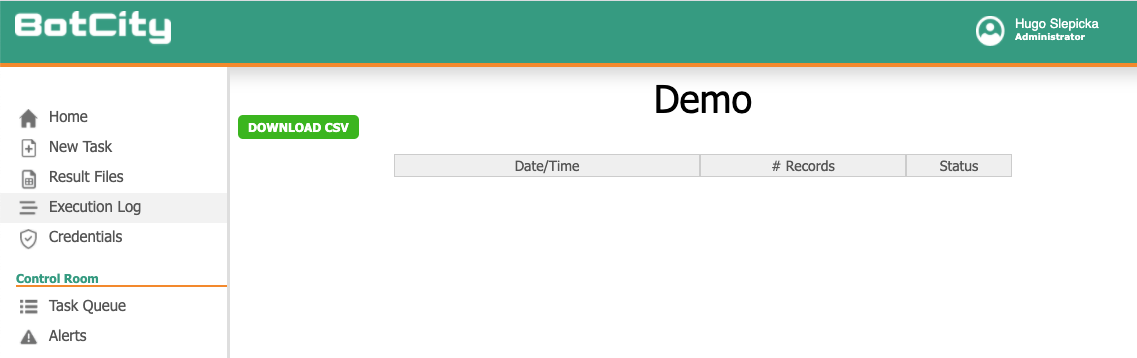

### Creating new Log Entries

With your shiny new log ready, it is time to create some log entries.

Here is how you can insert new log entries:

(More information and details on the parameters used can be found [here](https://botcity-dev.github.io/botcity-maestro-sdk-python/api/sdk.html#botcity.maestro.sdk.BotMaestroSDK.new_log_entry).)

In [ ]:
import datetime

maestro.new_log_entry(
    activity_label="DemoActivity",
    values = {
        "timestamp": datetime.datetime.now().strftime("%Y-%m-%d_%H-%M"),
        "records": "10",
        "status": "SUCCESS"
    }
)

#### Your new Log Entry is ready

The new entry is now displayed on the `Demo Activity` logbook.

> **⚠ PRO TIP**  
> Using strings like `SUCCESS`, `FAILED`, `YES`, `NO`, `true` or `false` will render icons 
> such as the green check mark displayed below.

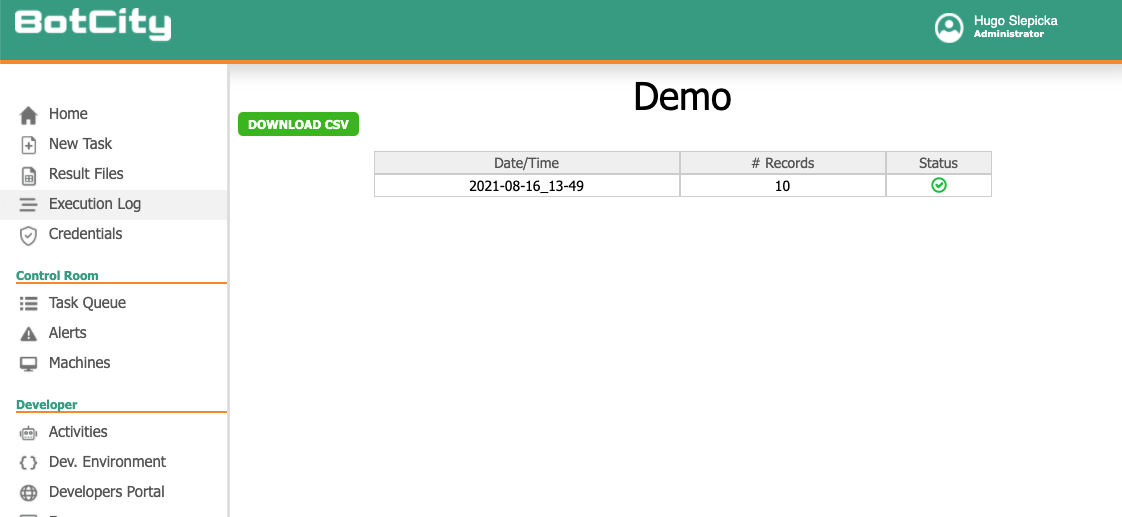

### Fetch Log Data

Retrieving log data is as easy as creating log entries.

Optionally we can also pass a `date` argument which acts as filters the initial date for log to be retrieved.
The `date` parameter must use the `DD/MM/YYYY` format. If `date` is not informed, all data from the log is retrieved.

(More information and details on the parameters used can be found [here](https://botcity-dev.github.io/botcity-maestro-sdk-python/api/sdk.html#botcity.maestro.sdk.BotMaestroSDK.get_log).)

In [ ]:
maestro.get_log(activity_label='DemoActivity')

In [ ]:
# Get today's date in the DD/MM/YYYY format.
today = datetime.datetime.now().strftime("%d/%m/%Y")

maestro.get_log(activity_label='DemoActivity', date=today)

### Deleting an entire Log

If by any reason you need to completely remove the log along with all its entries,
you can do so using the command below.

(More information and details on the parameters used can be found [here](https://botcity-dev.github.io/botcity-maestro-sdk-python/api/sdk.html#botcity.maestro.sdk.BotMaestroSDK.delete_log).)

In [ ]:
maestro.delete_log(activity_label="DemoActivity")

## Alerts

Alerts are customized messages for a task with an `alert level`, `title` and `message`.

The alerts are displayed on the `Alerts` menu of the BotMaestro portal and they can provide clear and fast information about the status of a task and activity.

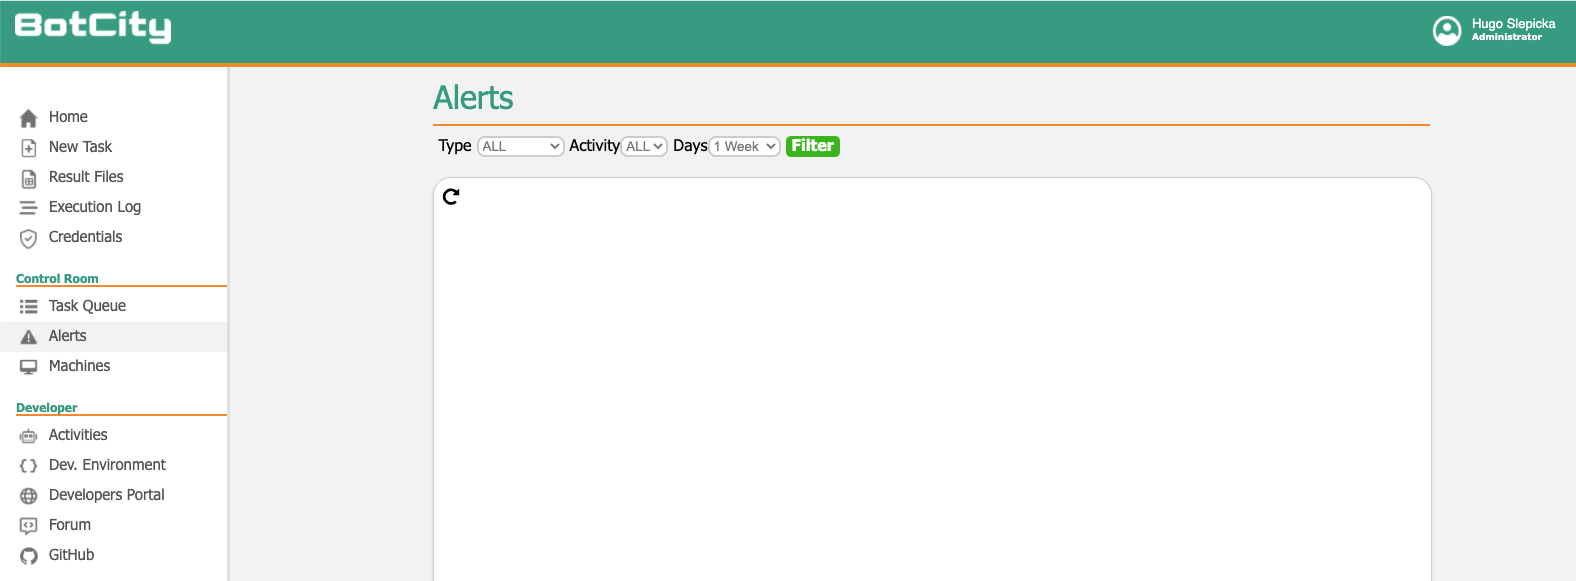

### Emitting Alerts

An alert can be emitted with one of the following types:
    
- `INFO`: Information alert.
- `WARN`: Warning alert.
- `ERROR`: Error alert.

The possible alert types are available via code using the `AlertType` Enum.

Here is how we emit alerts for the task created on the previous step:

(More information and details on the parameters used can be found [here](https://botcity-dev.github.io/botcity-maestro-sdk-python/api/sdk.html#botcity.maestro.sdk.BotMaestroSDK.finish_task).)

> **⚠ PRO TIP**  
> When implementing your bot, the `task_id` is available via the `execution` object
> and you can access it liek this:
> `execution.task_id`.

#### Info Alert

In [ ]:
maestro.alert(task_id=task.id, title="Info Alert", message="This is an info alert", alert_type=AlertType.INFO)

#### Warn Alert

In [ ]:
maestro.alert(task_id=task.id, title="Warn Alert", message="This is a warn alert", alert_type=AlertType.WARN)

#### Error Alert

In [ ]:
maestro.alert(task_id=task.id, title="Error Alert", message="This is an error alert", alert_type=AlertType.ERROR)

#### Your alerts are ready

When you navigate into the BotMaestro portal and click over Alerts, the recently generated alerts will be available.

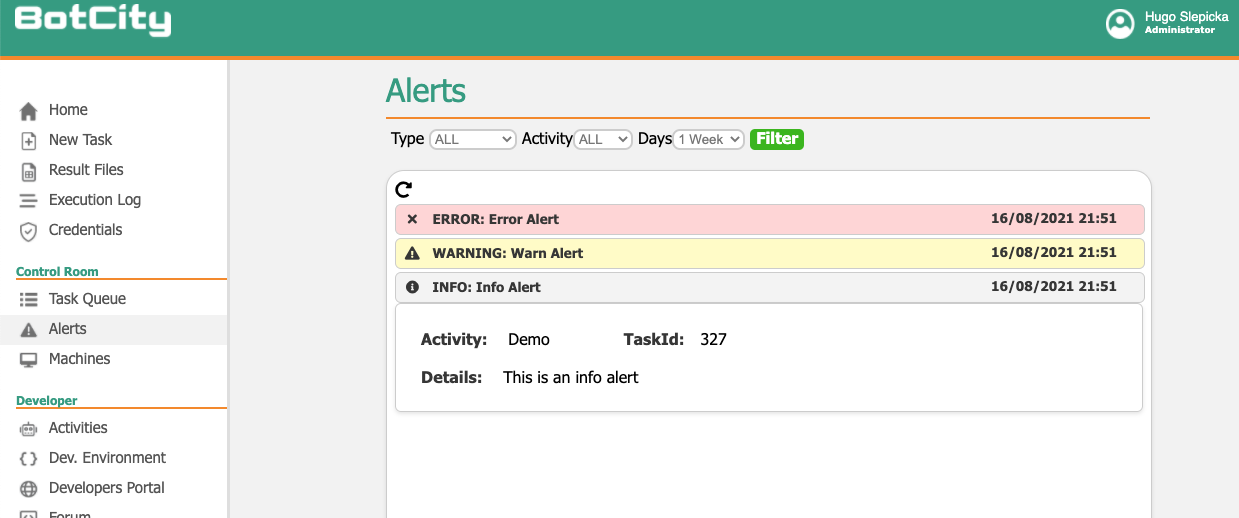

## Messages

By using the BotMaestro SDK, users can send messages to each other or even external email addresses in a very simple way.

The Maestro SDK can send two types of messages:
    
- `TEXT`: Plain text message body.
- `HTML`: HTML message body.

The possible message types are available via code using the `MessageType` Enum.

Here is how we send messages via the Maestro SDK:

(More information and details on the parameters used can be found [here](https://botcity-dev.github.io/botcity-maestro-sdk-python/api/sdk.html#botcity.maestro.sdk.BotMaestroSDK.message).)


In [ ]:
emails = ["your_email@your_provider.com"]  # List of emails, if not using, pass an empty list
users = ["maestro_user1", "maestro_user2"]  # List of usernames, if not using, pass an empty list

subject = "Test Message"
body = "This is the message content."

maestro.message(emails, users, subject, body, MessageType.TEXT)

#### You've got mail

If everything went well with the parameters informed, you probably received an email like this:
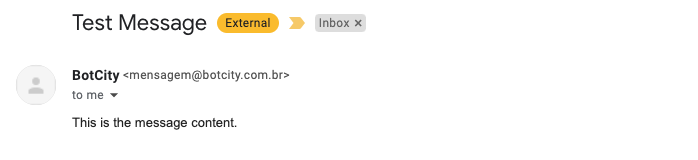

## Artifacts / Result Files

During execution of your bot, it can upload or download any type of files to/from the BotMaestro portal.

As a general term, we refer to those files are `artifacts` or `result files`.

They can be accessed via the menu `Result Files` on the BotMaestro portal.

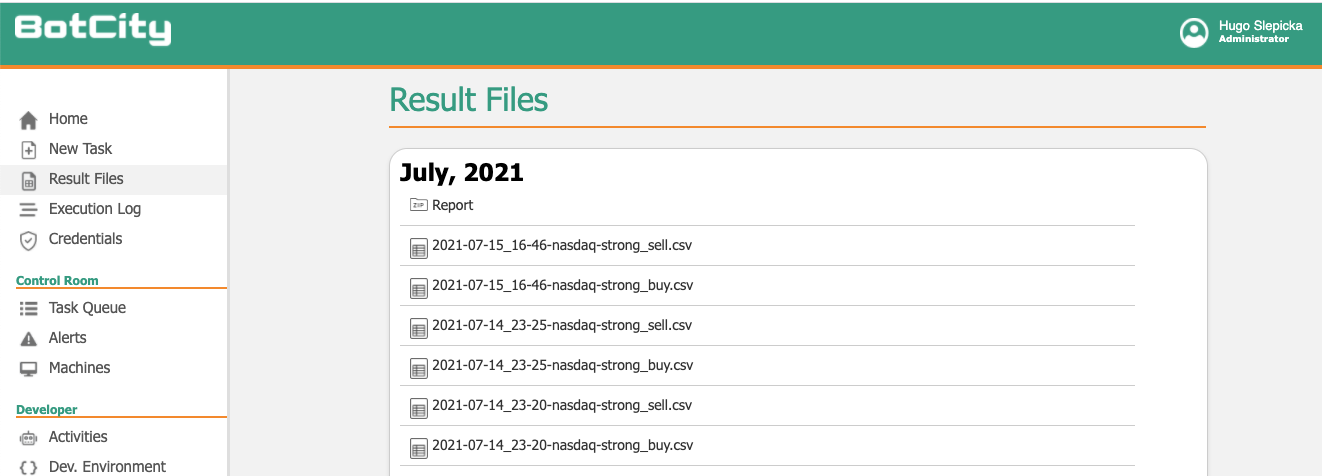

You can download the files directly from the web interface or using the Maestro SDK.

Over the next steps we will show you how to upload and download artifacts using the SDK API.

### Uploading an Artifact

In this example we will generate a temporary text file and upload this artifact to BotMaestro.

(More information and details on the parameters used can be found [here](https://botcity-dev.github.io/botcity-maestro-sdk-python/api/sdk.html#botcity.maestro.sdk.BotMaestroSDK.post_artifact).)
                                                                         


#### Creating a Temporary File

In [ ]:
with open("my_artifact.txt", "w") as f:
    f.writelines(["My First Artifact", " with BotMaestro SDK Python!"])

#### Uploading the Artifact

> **⚠ PRO TIP**  
> When implementing your bot, the `task_id` is available via the `execution` object
> and you can access it liek this:
> `execution.task_id`.

In [ ]:
maestro.post_artifact(task_id=task.id, artifact_name="My Artifact", filepath="my_artifact.txt")

#### Viewing the new Artifact

If we now go into the BotMaestro web portal, the new artifact will be displayed.

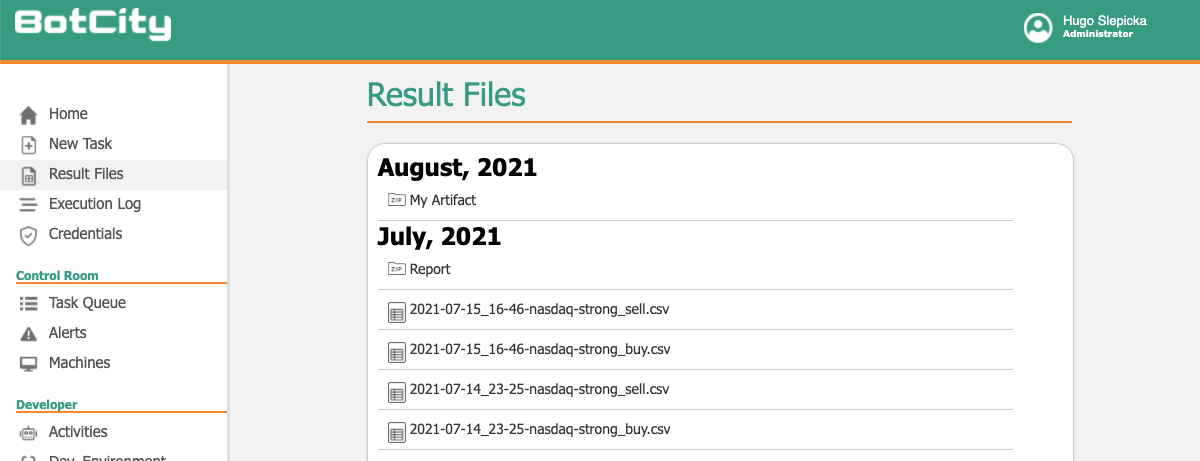

### Downloading an Artifact

In order to download an artifact you will need the `artifact id`.

The `get_artifact` method returns the artifact name and the file content as an array of bytes.

Here is how we download an artifact via the BotMaestro SDK:

(More information and details on the parameters used can be found [here](https://botcity-dev.github.io/botcity-maestro-sdk-python/api/sdk.html#botcity.maestro.sdk.BotMaestroSDK.get_artifact).)

In [ ]:
name, content = maestro.get_artifact(artifact_id=134)

#### Saving to Disk

In [ ]:
with open(f"{name}.txt", "wb") as f:
    f.write(content)

## Next Steps

This concludes this tutorial. Thank you for following along.
As next step we recommend that you try to integrate the BotMaestro SDK into your Bot.

In case you have questions, suggestions or bump into an issue, feel free to [reach out in our community](http://community.botcity.dev/).

Have fun Automating!